# Ajuste linear de curvas

Como vimos na semana passada, quando temos um conjunto de pontos $({x_i, y_i})$ de amostragens de uma função $y_i = f(x_i)$, podemos estimar o valor de $y$ para um $x$ arbitrário usando alguma interpolação $P(x)$. A interpolação tem uma grande vantagem, que é $P(x_i) = f(x_i)$, isto é, a função interpoladora $P(x)$ concorda com a função original $f(x)$ nos pontos $x_i$.

Isto pressupõe que $f(x)$ é uma função conhecida, e os valores $f(x_i)$ a nossa disposição são exatos. Estas são suposições que precisamos abandonar quando trabalhamos com dados experimentais.

## Modelando dados experimentais

Vamo supor que queremos estudar experimentalmente um sistema massa–mola. Conhecemos a lei de Hooke, dada por

$$
F = -k\ \Delta x.
$$

Nós temos disponíveis uma balança e uma régua, logo, convém rearranjar a lei de Hooke em termos das nossas quantidades mensuráveis. Vamos pesar algumas massas na balança, obtendo massas $m_i$, e pendurar numa mola de constante elástica $k$ desconhecida.

Para uma dada massa $m$, a mola irá distender até uma posição $l$ tal que $\Delta x = l - l_0$, onde $l_0$ é o ponto onde a mola está relaxada. No equilíbrio, a força dada pela lei de Hooke se iguala à força da gravidade, isto é,

\begin{align}
F &= F_\mathrm{G} \\
-k\ \Delta x = -k (l - l_0) &= - m g \\
l - l_0 &= \frac{g}{k} m\\
l &= l_0 + \frac{g}{k} m\\
l &= a + b m.
\end{align}

Ou seja, a distenção da mola é proporcional à massa, com uma constante de proporcionalidade $b = \frac g k$ e um viés (ou coeficiente linear) $a = l_0$. Queremos descobrir qual o valor da constante da mola (talvez também $l_0$), e poder prever qual a distenção da mola para uma massa arbitrária $m$.

Tomamos várias massas, $m_i$ em $\mathrm{kg}$, e medimos a distenção da mola, em $\mathrm{cm}$. A medida da distenção tem uma incerteza associada $\sigma_i = 1.0\,\mathrm{cm}$, igual para todas as medidas.

In [1]:
import numpy as np

# Medidas experimentais
m_exp = np.array([2.0, 4.0, 6.0, 8.0, 10.0])
l_exp = np.array([42.0, 48.4, 51.3, 56.3, 58.6])
s_exp = np.array([1.0, 1.0, 1.0, 1.0, 1.0])

Sabendo que a relação entre massa e distenção é linear, podemos de forma ingênua usar uma interpolação linear e obter uma lei empirica que nos dá a resposta exata. Porém, veja no gráfico abaixo que tal lei empírica nos daria uma função linear por partes.

In [2]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')
plt.rcParams['font.family'] = 'serif'
plt.rcParams['mathtext.fontset'] = 'stix'

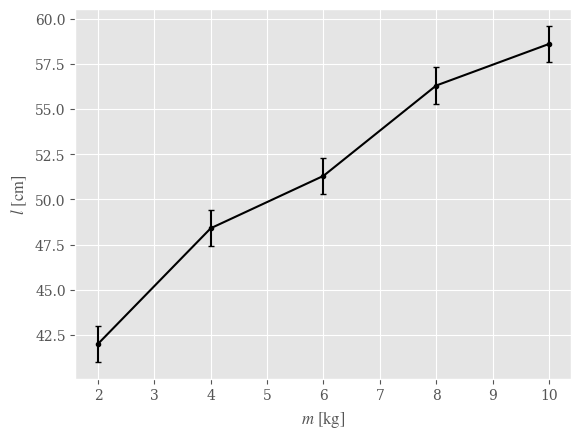

In [3]:
fig, ax = plt.subplots()
m = np.linspace(2.0, 10.0, 100)
ax.errorbar(m_exp, l_exp, yerr=s_exp,
            ls='-', marker='.', capsize=2, color='k')
ax.set_xlabel(r'$m\ [\mathrm{kg}]$')
ax.set_ylabel(r'$l\ [\mathrm{cm}]$')
plt.show()

Veja que cada segmento tem uma inclinação diferente. Ora, isto quer dizer que a constante elástica da mola muda com a massa? A resposta é óbvia: não. 

O problema é que modelo não leva em conta que os comprimentos de distenção da mola, como qualquer medida experimental, têm incertezas. Assim, é esperado que as medidas não caiam numa linha reta, mesmo que a lei por trás do fenômeno seja linear. Como devemos fazer, então?

## Ajuste linear

Vamos aceitar que as medidas possuem uma incerteza inerente, e vamos fazer a hipótese de que exite, sim, uma lei linear dada pela lei de Hooke, que descreve o sistema. Como discutimos acima, a lei linear é

$$
l(m) = a + b m,
$$

onde $b = \frac g k$ é a inclinação da reta, e $a = l_0$ é o coeficiente linear, isto é, o ponto onde a reta intercepta o eixo $y$ ($m=0$).

Nada impede que façamos como no Laboratório de Física e tracemos uma reta à mão, que passe mais ou menos perto de todos os pontos. Mas, nós somos preciosistas e métódicos. Não basta uma boa reta, queremos encontrar, se possível, a melhor reta, que descreve o sistema com maior precisão, dadas as medidas experimentais diponíveis. Vamos montar um formalismo que nos permita dar uma "nota" a um dado modelo. Assim, o problema se transforma em buscar a melhor nota entre os modelos.

### Mínimos quadrados, ou $\chi^2$

Para ser mais genéricos, vamos supor que temos um conjunto de $N$ pontos $(x_i, y_i)$. Estes pontos são medidas experimentais de um certo modelo $y(x|a_0, a_1, \ldots, a_{M-1})$, que é função de $x$, e depende de $M$ parâmetros $a_0, a_1, \ldots, a_{M-1}$. Queremos encontrar o modelo — isto é, o conjunto de parâmetros $a_k$ — que melhor descreve os $N$ pontos. Uma estratégia interessante é primeiro inverter a pergunta: dado um certo conjunto de parâmetros $a_k$, qual a probabilidade de que os pontos observados tenham ocorrido?

Para simplificar a notação, vamos nos referir ao modelo apenas como $y(x)$, os parâmetros $a_k$ ficam implícitos. Como estamos falando de $y_i$ que tomam valores contínuos, isto é descrito por uma densidade de probabilidade. Vamos admitir que cada ponto $y_i$ tem um erro de medição que é independente, aleatório, e tem uma distribuição gaussiana ao redor do valor verdadeiro $y(x_i)$. Isto é, os $y_i$ seguem distribuições *normais*. 

O desvio padrão desta distribuição, dado por $\sigma_i$, descreve a incerteza na medida $y_i$. A probabilidade de que o ponto $y(x_i)$ seja medido em uma caixa de largura $\Delta y$ ao redor de $y_i$ é descrito por uma função gaussiana,

$$
P_i \propto \exp \left[ - \frac 1 2 \left( \frac{y_i - y(x_i)}{\sigma_i} \right)^2 \right] \Delta y.
$$

O sinal de proporcionalidade vem do fato de que $P_i$ deve ser normalizada (a sua integral deve ser igual a 1). A probabilidade de que dois eventos com probabilidades $P_1$ e $P_2$ aconteçam ao mesmo tempo é o produto $P_1 \times P_2$. Assim, a probabilidade de que se obtenha todos os dados observados, dado um modelo $y(x)$, é

\begin{align}
P(\text{dados}|\text{modelo}) \propto \prod_{i=0}^{N-1} \left\{ \exp \left[ - \frac 1 2 \left( \frac{y_i - y(x_i)}{\sigma_i} \right)^2 \right] \Delta y \right\}.
\end{align}

Nesta notação, $P(\text{dados}|\text{modelo})$ significa *a probabilidade de que ocorram os **dados** $\{x_i, y_i\}$, quando temos o **modelo** de parâmetros $a_0, a_1, \dots, a_{M-1}$*. Entretanto, lembre que o nosso problema é o oposto: temos os dados, e queremos saber qual a probabilidade de cada modelo, para escolher o mais provável. Isto é, precisamos de $P(\text{modelo}| \text{dados})$.

Por sorte, somos adeptos da [estatística bayesiana](https://seeing-theory.brown.edu/bayesian-inference/index.html). Segundo o teorema de Bayes,

$$
P(\text{modelo}| \text{dados}) \propto P(\text{dados}|\text{modelo}) \times P(\text{modelo}),
$$

onde $P(\text{modelo})$ é a probabilidade da ocorrência de um determinado modelo, também conhecida como *prior*. Supondo que todos os modelos têm igual probabilidade (uma hipótese bastante comum em inferências estatísticas), então a proporcionalidade fica

$$
P(\text{modelo}| \text{dados}) \propto P(\text{dados}|\text{modelo}).
$$

Portanto, o modelo com maior $P(\text{dados}|\text{modelo})$ é o que descreve melhor os dados observados. Basta escolher a função tal que a probabilidade $P(\text{modelo}| \text{dados})$ é máxima para encontrarmos o melhor modelo. Isto é,

\begin{align}
\max_{y(x)} P(\text{modelo}|\text{dados}) &= \max_{y(x)} P(\text{dados}|\text{modelo}) \\
&= \max_{y(x)} \prod_{i=0}^{N-1} \left\{ \exp \left[ - \frac 1 2 \left( \frac{y_i - y(x_i)}{\sigma_i} \right)^2 \right] \Delta y \right\}.
\end{align}

É mais conveniente tomar $- 2 \ln$ da probabilidade, para transformar o produto das probabilidades numa soma (usamos a propriedade de que $\ln (a \times b) = \ln a + \ln b$). De quebra, $\ln e^a = a$, simplificando ainda mais a expressão.

Repare que, como temos um sinal negativo, o máximo de $P$ corresponde ao mínimo de $-2 \ln P$. A equação acima fica então

\begin{align}
\min_{y(x)} \left[ -2 \ln P(\text{modelo}|\text{dados}) \right] = \min_{y(x)} \left[ \sum_{i=0}^{N-1} \left( \frac{y_i - y(x_i)}{\sigma_i} \right)^2 \right] - 2N \ln \Delta y.
\end{align}

Dado que $\Delta y$ é arbitrário, e o mesmo para todos os modelos, o termo à direita é irrelevante para a minimização. Lembramos também que a função $y(x)$ tem $M$ parâmetros livres $a_0, a_1, \ldots, a_{M-1}$, ou seja, $y(x) = y(x|a_0,\ldots,a_{M-1})$. Vamos então definir a quantidade $\chi^2$, pronunciada "qui quadrado":

$$
\chi^2 \equiv -2 \ln P(\text{modelo}|\text{dados}).
$$

Esta é a chamada *figura de mérito* do ajuste do modelo $y(x)$ aos dados $y_i$. Explicitamente,

$$
\chi^2(a_0, \ldots, a_{M-1}) = \sum_{i=0}^{N-1} \left( \frac{y_i - y(x_i|a_0,\ldots,a_{M-1})}{\sigma_i} \right)^2.
$$

A função $y(x)$ que melhor descreve os pontos observados $(x_i, y_i)$ é tal que ela minimiza o $\chi^2$, que é função somente dos parâmetros $a_k$. Estes parâmetros formam um espaço abstrato de $M$ dimensões, chamado *espaço de parâmetros*. Assim, minimizar $\chi^2$ significa literalmente encontrar o mínimo de uma função de $M$ variáveis. Finalmente temos uma maneira objetiva de encontrar a melhor função $y(x)$.

### De volta ao ajuste linear

Agora que já temos um formalismo definido, precisamos descobrir como aplicá-lo a um problema de ajuste linear, isto é, como encontrar a melhor reta que se ajusta aos pontos observados. Ainda de forma genérica, vamos dizer que a função modelo que estamos querendo ajustar é

$$
y(x) = y(x|a,b) = a + b x.
$$

Os parâmetros livres são as quantidades $a$ e $b$, que formam um espaço de parâmetros bidimensional. Estes parâmetros têm nomes, $a$ é o *coeficiente linear*, e $b$ o *coeficiente angular*, ou inclinação da reta. Se temos $N$ pontos $(x_i, y_i)$, com incertezas em $y_i$ descritas pelos desvios padrão $\sigma_i$, e dados os parâmetros $a$ e $b$, a figura de mérito $\chi^2$ é

$$
\chi^2(a, b) = \sum_{i=0}^{N-1} \left( \frac{y_i - a - b x_i}{\sigma_i} \right)^2.
$$

#### Exercício 1

Considerando o sistema massa-mola, crie uma função para calcular o $\chi^2$ de um modelo dado pelos coeficientes $a$ e $b$, usando a assinatura definida abaixo. Lembre que no nosso problema, $x_i = m_i$ e $y_i = l_i$, e a incerteza nas medidas da distenção da mola ($\sigma_i$) são todas iguais a $1\,\mathrm{cm}$. Calcule o $\chi^2$ para $a = 40$ e $b = 1.5$.

*Resposta:* $\chi^2 \cong 43.50$.

In [8]:
def chi2_reta(xx, yy, ss, a, b):
    '''
    Parâmetros
    ----------
    xx : array
        Variáveis independentes.

    yy : array
        Variáveis dependentes.

    ss : array
        Incertezas associadas a yy.
    
    a : float
        Coeficiente linear.
    
    b : float
        Coeficiente angular.
        
    Retorna
    -------
    
    chi2 : float
        Figura de mérito do ajuste do
        modelo {a, b} aos dados {xx, yy, ss}.
    '''
    N = len(xx)

    chi = 0
    for i in range(N):
        chi += ((yy[i] - a - b*xx[i])/ss[i])**2

    return chi


a = 40.0
b = 1.5

chi2 = chi2_reta(m_exp, l_exp, s_exp, a, b)
print(f'chi² = {chi2:.2f}')

chi² = 43.50


Vamos ver como se comporta o $\chi^2$ numa região do espaço de parâmetros. Queremos encontar o ponto onde $\chi^2$ é mínimo, então é uma boa ideia explorar esse espaço para ter uma intuição sobre como o $\chi^2$ varia.

In [9]:
# Amostragem do espaço de parâmetros.
N = 20
a1, a2 = 34.0, 45.0
aa = np.linspace(a1, a2, N)

b1, b2 = 1.0, 3.0
bb = np.linspace(b1, b2, N)

# chi2 é um array bidimensional de NxN.
# Inicializando chi2 com zeros.
chi2 = np.zeros((N, N))

# Calcular chi2 para todas as combinações de a e b possívels.
for i, a in enumerate(aa):
    for j, b in enumerate(bb):
        chi2[i, j] = chi2_reta(m_exp, l_exp, s_exp, a, b)

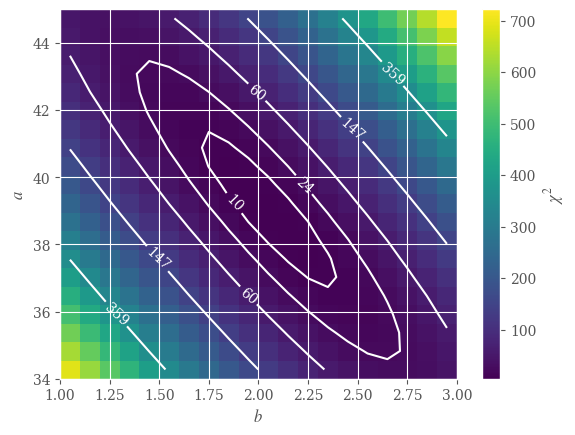

In [10]:
fig, ax = plt.subplots()
im = ax.imshow(chi2, cmap='viridis', origin='lower', extent=[b1, b2, a1, a2], aspect='auto')
levels = np.logspace(1, 4.5, 10)
cs = ax.contour(chi2, levels=levels, origin='lower', extent=[b1, b2, a1, a2], colors='w')
ax.clabel(cs, levels, colors='w')
ax.set_xlabel('$b$')
ax.set_ylabel('$a$')
plt.colorbar(im, label='$\chi^2$')
plt.show()

Como minimizar o $\chi^2$ para encontrar a melhor reta? A forma mais ingênua seria buscar dentro do array `chi2` o seu menor valor, e aí estão $a$ e $b$ do melhor ajuste. Na prática, isto é inviável, pois requer um número muito grande de cálculos. Podemos tomar um caminho mais eficiente.

Repare que o $\chi^2$, no espaço de parâmetros, forma um vale. Basta então encontrar o ponto onde ele toma o menor valor. Você provavelmente já aprendeu a fazer isto em cálculo, quando temos um máximo ou mínimo de uma função: a sua derivada se anula. Em duas dimensões, isto deve ocorrer para as duas variáveis ao mesmo tempo, no "fundo do vale", onde um plano tangente à superfície fica horizontal.

Abaixo há uma visualização que ajuda a entender o formato da superfície definida pelo $\chi^2$. Mude o argumento da linha `ax.view_init(azim=280)` para mudar a direção de onde se olha o gráfico.

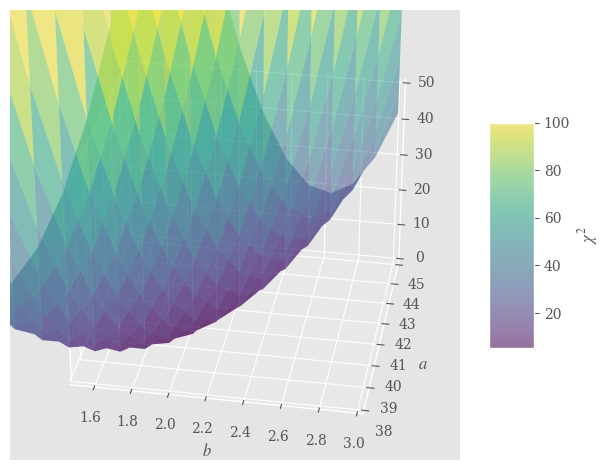

In [11]:
fig, ax = plt.subplots(subplot_kw={'projection': '3d'})
surf = ax.plot_surface(bb, aa, chi2, cmap='viridis', vmax=100,
                       linewidth=0, antialiased=True, shade=True, alpha=0.5)
ax.set_zlim(0, 50)
ax.set_ylim(38,45)
ax.set_xlim(1.5,3.0)
ax.set_xlabel(r'$b$')
ax.set_ylabel(r'$a$')

fig.colorbar(surf, shrink=0.5, aspect=5, label=r'$\chi^2$')
ax.view_init(azim=280)
fig.set_tight_layout(True)
plt.show()

Vamos então encontrar o fundo do vale. Nos mínimos da função $\chi^2(a,b)$ as derivadas se anulam, isto é,

\begin{align}
\frac{\partial \chi^2}{\partial a} &= -2 \sum_{i=0}^{N-1} \left( \frac{y_i - a - b x_i}{\sigma_i^2} \right) = 0, \\
\frac{\partial \chi^2}{\partial b} &= -2 \sum_{i=0}^{N-1} \left( \frac{x_i (y_i - a - b x_i)}{\sigma_i^2} \right) = 0.
\end{align}

Reorganizando,

\begin{align}
\sum_{i=0}^{N-1} \left( \frac{y_i - a - b x_i}{\sigma_i^2} \right) &= \sum_{i=0}^{N-1}\frac{y_i}{\sigma_i^2} - a \sum_{i=0}^{N-1}\frac{1}{\sigma_i^2} - b \sum_{i=0}^{N-1}\frac{x_i}{\sigma_i^2} = 0 \\
\sum_{i=0}^{N-1} \left( \frac{x_i (y_i - a - b x_i)}{\sigma_i^2} \right) &= \sum_{i=0}^{N-1} \frac{x_i y_i}{\sigma_i^2}  - a\sum_{i=0}^{N-1} \frac{x_i}{\sigma_i^2} - b \sum_{i=0}^{N-1} \frac{x_i^2}{\sigma_i^2} = 0.
\end{align}

Para simplificar a notação, vamos definir as quantidades

\begin{align}
S &\equiv \sum_{i=0}^{N-1}\frac{1}{\sigma_i^2},\qquad S_x \equiv \sum_{i=0}^{N-1}\frac{x_i}{\sigma_i^2},\qquad S_y \equiv \sum_{i=0}^{N-1}\frac{y_i}{\sigma_i^2}, \\
S_{xy} &\equiv \sum_{i=0}^{N-1}\frac{x_i y_i}{\sigma_i^2},\qquad S_{xx} \equiv \sum_{i=0}^{N-1}\frac{x_i^2}{\sigma_i^2}.
\end{align}

Estas são quantidades que dependem apenas dos pontos observados, $(x_i, y_i)$, e podem ser pré-calculadas sem fazermos qualquer hipótese sobre o modelo. Com estas definições, podemos ver mais claramente que as equações da minimização formam um sistema linear de equações,

\begin{align}
a S + b S_x &= S_y \\
a S_x + b S_{xx} &= S_{xy}.
\end{align}

Este sistema é muito simples de resolver por eliminação. A solução é

\begin{align}
a &= \frac{S_{xx} S_y - S_x S_{xy}}{\Delta} \\
b &= \frac{S S_{xy} - S_x S_y}{\Delta} \\
\Delta &\equiv S S_{xx} - S_x^2.
\end{align}

Estes valores de $a$ e $b$ nos dão a melhor reta $y(x) = a + bx$ que ajusta os pontos $\{x_i, y_i\}$.

#### Exercício 2

Voltando ao sistema massa-mola. Temos um conjunto de dados $\{m_i, l_i\}$, e um modelo linear $l(m|a, b) = a + b m$, e desejamos encontrar os parâmetros $a$ e $b$ que nos dão o modelo que mais se ajusta aos dados. Vamos colocar os dados observados em arrays.

In [12]:
# Medidas experimentais
m_exp = np.array([2.0, 4.0, 6.0, 8.0, 10.0])
l_exp = np.array([42.0, 48.4, 51.3, 56.3, 58.6])
s_exp = np.array([1.0, 1.0, 1.0, 1.0, 1.0])

**a.** Calcule as quantidades $S$, $S_x$, $S_y$, $S_{xy}$ e $S_{xx}$.

In [20]:
N = len(m_exp)

# Calculando S
S = 0
S_m = 0
S_l = 0
S_ml = 0
S_mm = 0

# Laço que vai calcular todos os valores acima
for i in range(N):
    S += (1/s_exp[i]**2)
    S_m += (m_exp[i]/s_exp[i]**2)
    S_l += (l_exp[i]/s_exp[i]**2)
    S_ml += (m_exp[i]*l_exp[i]/s_exp[i]**2)
    S_mm += (m_exp[i]**2/s_exp[i]**2)

In [21]:
print(S,S_m,S_l,S_ml,S_mm)

5.0 30.0 256.6 1621.8 220.0


**b.** Calcule os coeficientes $a$ e $b$ do melhor modelo.

In [22]:
Delta = S*S_mm - S_m**2

# calculando a e b
a = (S_mm*S_l - S_m*S_ml)/(Delta)
b = (S*S_ml - S_m*S_l)/(Delta)

In [23]:
print(a,b)

38.99000000000004 2.0549999999999953


**c.** Conhecendo $b$ em $\mathrm{cm}\,\mathrm{kg}^{-1}$, determine qual a constante elástica da mola, sabendo que $g = 9{,}80665\,\mathrm{m}\,\mathrm{s}^{-2}$.

In [26]:
# b = g/k
# k =g/b
g = 9.80665

k = g/b
print(k)

4.772092457420936


**d.** Faça o gráfico do melhor modelo, mostrando também os pontos experimentais (reutilize o gráfico de barras de erros que fizemos acima).

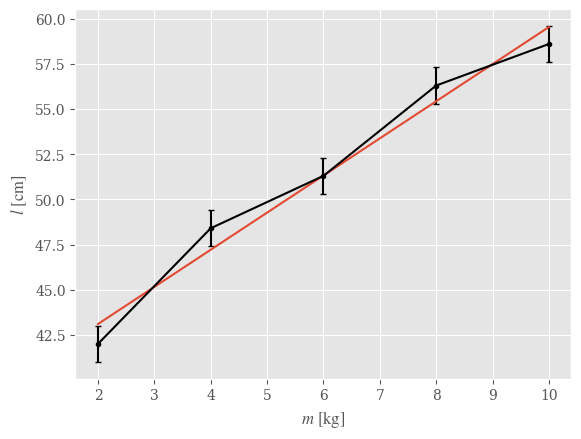

In [30]:
fig, ax = plt.subplots()
m = np.linspace(2.0, 10.0, 100)
ax.errorbar(m_exp, l_exp, yerr=s_exp,
            ls='-', marker='.', capsize=2, color='k')
ax.set_xlabel(r'$m\ [\mathrm{kg}]$')
ax.set_ylabel(r'$l\ [\mathrm{cm}]$')
ax.plot(m_exp,a + b*m_exp)
plt.show()

### Qualidade do ajuste

Agora que encontramos um modelo que se ajusta aos dados, segundo o nosso critério objetivo (minimizar o $\chi^2$), temos que analisar o resultado. O modelo realmente representa bem os dados observados? O ajuste ficou bom? Existem *outliers*?

Existem formas objetivas de se avaliar a qualidade de um ajuste, mas muitas vezes uma olhada no gráfico é suficiente para dizer que há algo errado ali. Por exemplo, barras de erro grandes demais, ou pequenas demais, ou então dados que visivelmente não seguem uma lei linear. Os dados são confiáveis?

O código do ajuste não sabe nada disso, e vai ajustar uma reta a qualquer coisa que for usada como entrada. Nessa hora entram em cena o bom senso e o pensamento crítico.